In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Aerofit.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
def missingValue(df):
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md
missingValue(df)

Total records =  180


,Total Missing,In Percent
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0
Usage,0,0.0
Fitness,0,0.0
Income,0,0.0
Miles,0,0.0


no null values

In [5]:
df.shape

(180, 9)

In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Checking for data types

In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Univariate Analysis

In [8]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

There are 3 types of products 

In [10]:
df.Gender.unique().tolist()

['Male', 'Female']

In [11]:
df.Education.unique().tolist()
print("Education Years ranges from {0} to {1}".format(df['Education'].min(),df['Education'].max()))

Education Years ranges from 12 to 21


In [12]:
df.MaritalStatus.unique().tolist()

['Single', 'Partnered']

In [13]:
df.Usage.unique().tolist()
print("Number of times the prdocuct is used per week ranges from {0} to {1}".format(df['Usage'].min(),df['Usage'].max()))

Number of times the prdocuct is used per week ranges from 2 to 7


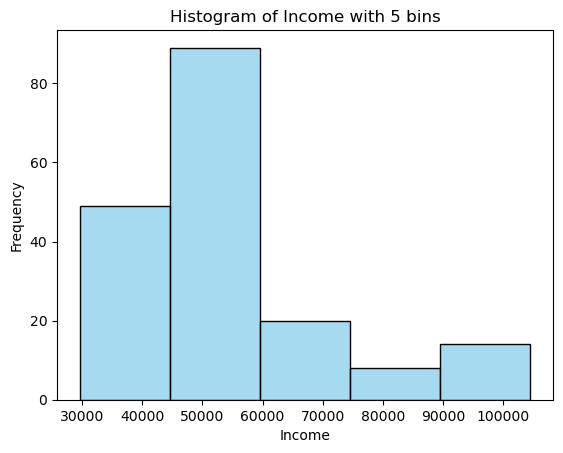

In [14]:
sns.histplot(data=df, x='Income', bins=5, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income with 5 bins')

# Show plot
plt.show()

Majority of the users lie in the 45k to 60k income category

In [15]:
print("Income in $ ranges from {0} to {1}".format(df['Income'].min(),df['Income'].max()))

Income in $ ranges from 29562 to 104581


In [16]:
print("Miles run in km ranges from {0} to {1}".format(df['Miles'].min(),df['Miles'].max()))

Miles run in km ranges from 21 to 360


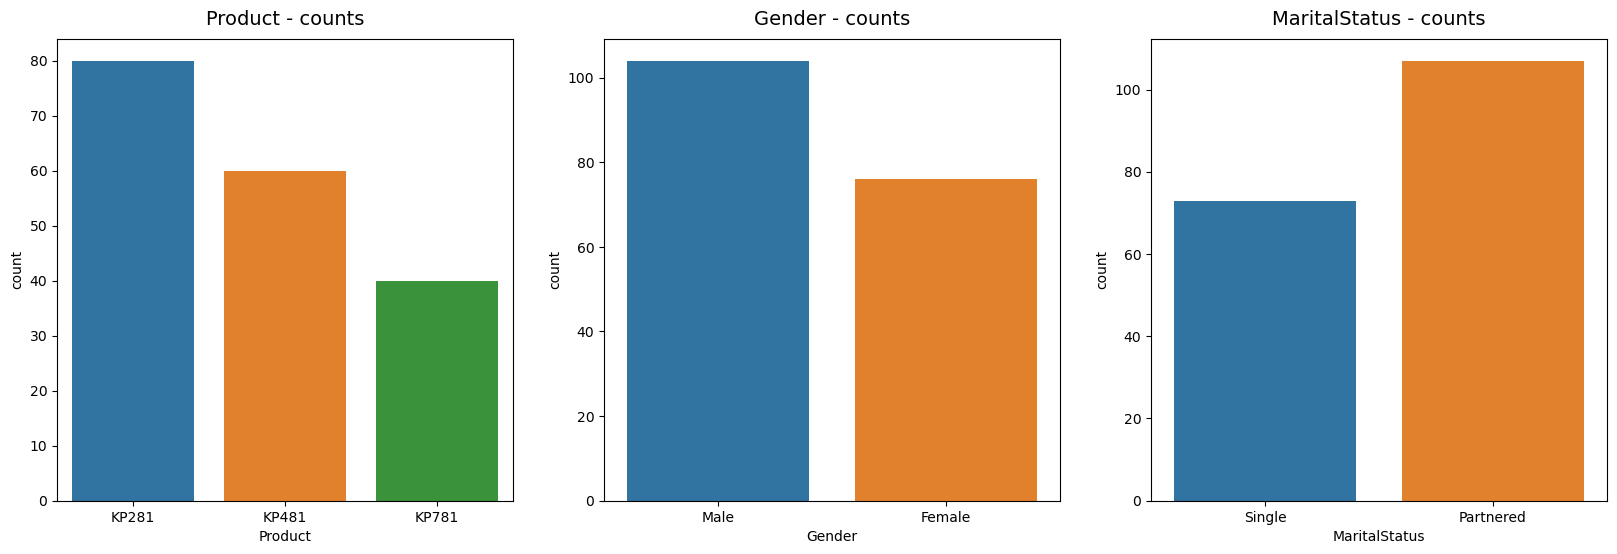

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()


KP281 is the most sold product in the given data

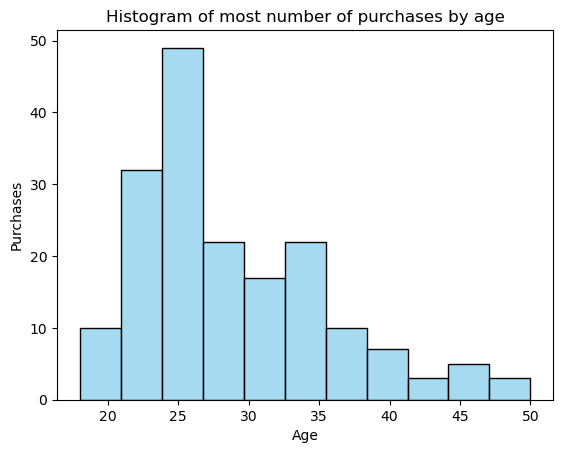

In [18]:
sns.histplot(data=df, x='Age', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Purchases')
plt.title('Histogram of most number of purchases by age')

# Show plot
plt.show()

Age 20 to 36 has the most number of purchases

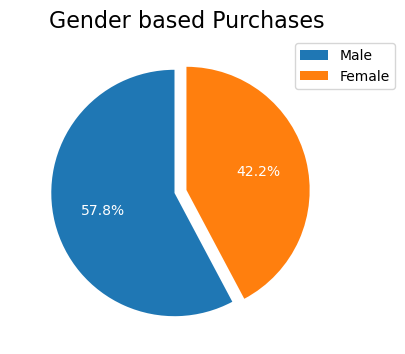

In [19]:
percent = df.Gender.value_counts()
plt.figure(figsize=(8,4))
plt.pie(percent.values, labels=percent.index, autopct='%.1f%%', startangle=90, explode=[0.1, 0], textprops={'color': 'white'})  # Set autopct text color to white
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.title('Gender based Purchases', fontsize=16)
plt.show()


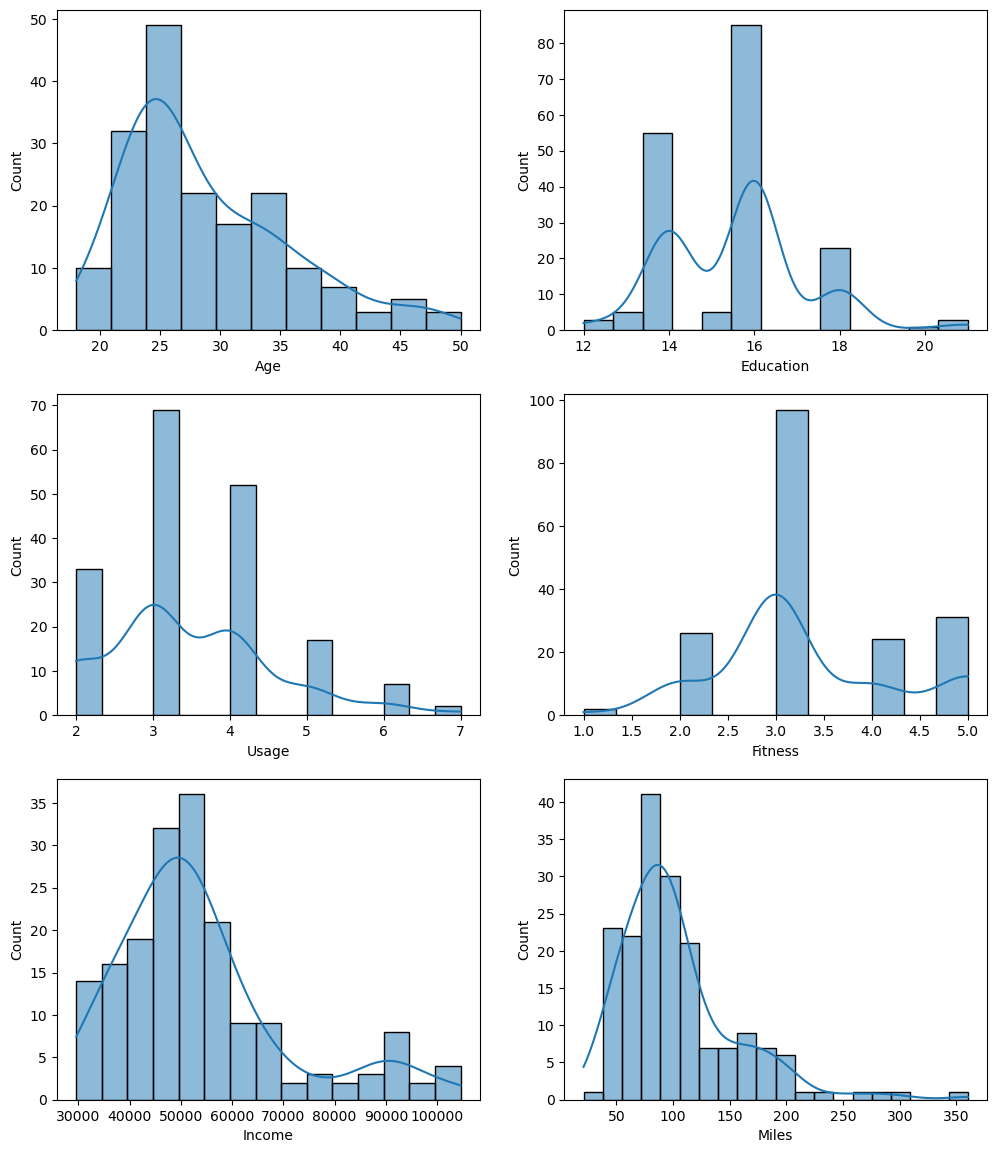

In [20]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

Detecting Outliers

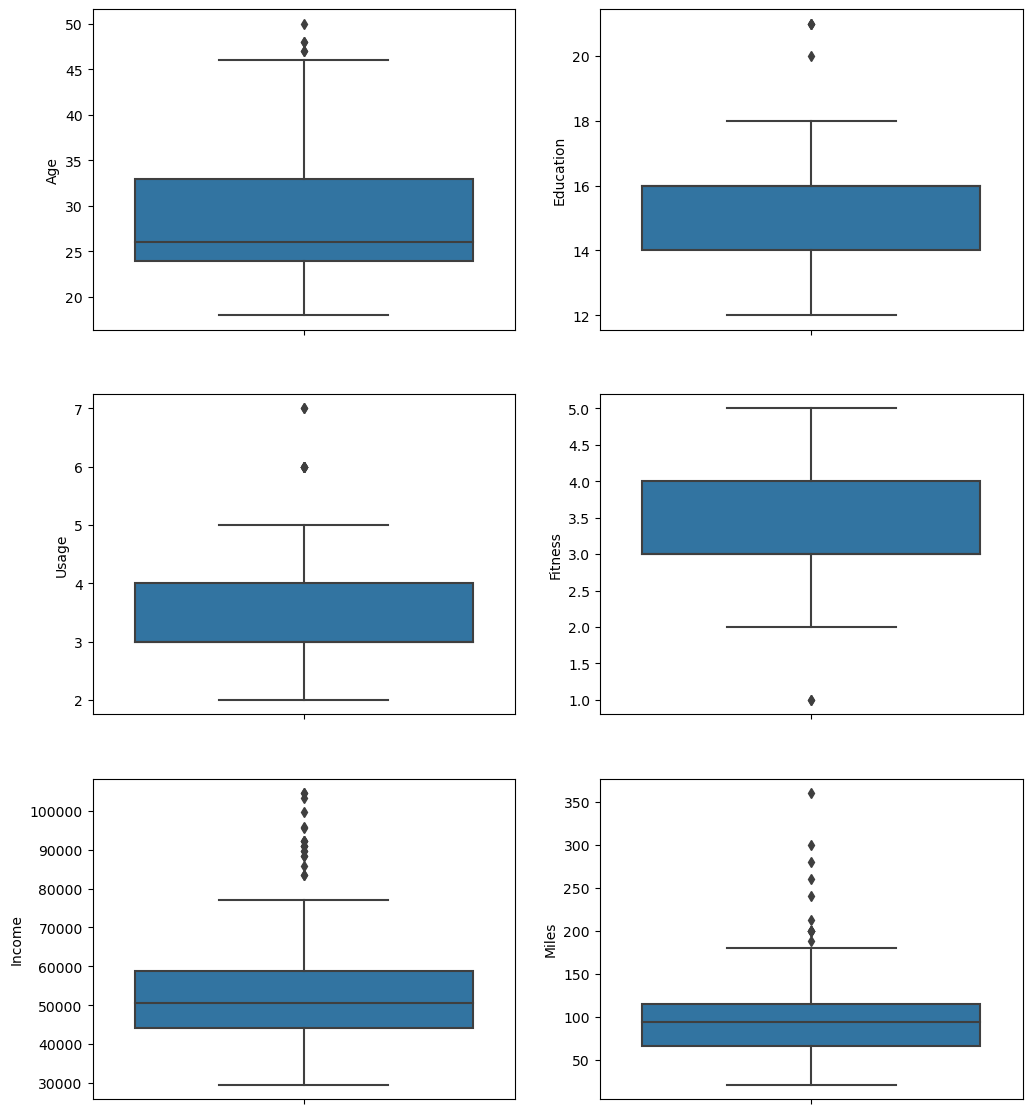

In [21]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, y="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, y="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, y="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, y="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, y="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, y="Miles", orient='h', ax=axis[2,1])

plt.show()

Obervation
from the boxplots it is quite clear that:

Age, Education and Usage are having very few outliers.
While Income and Miles have more outliers.
Majority of Customers fall within the USD 45,000 - USD 60,000 range
There are outliers over USD 85,000
Only a few of our customers run more than 180 miles per week|

normalized count for each variable is shown below

In [22]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count()*100 / len(df)

value
variable      value               
Gender        Female     42.222222
              Male       57.777778
MaritalStatus Partnered  59.444444
              Single     40.555556
Product       KP281      44.444444
              KP481      33.333333
              KP781      22.222222

Obervations
Product
44.44% of the customers have purchased KP2821 product.
33.33% of the customers have purchased KP481 product.
22.22% of the customers have purchased KP781 product.
Gender
57.78% of the customers are Male.
MaritalStatus
59.44% of the customers are Partnered.

Bivariate Analysis

Effect of Gender and Marital Status on purchases

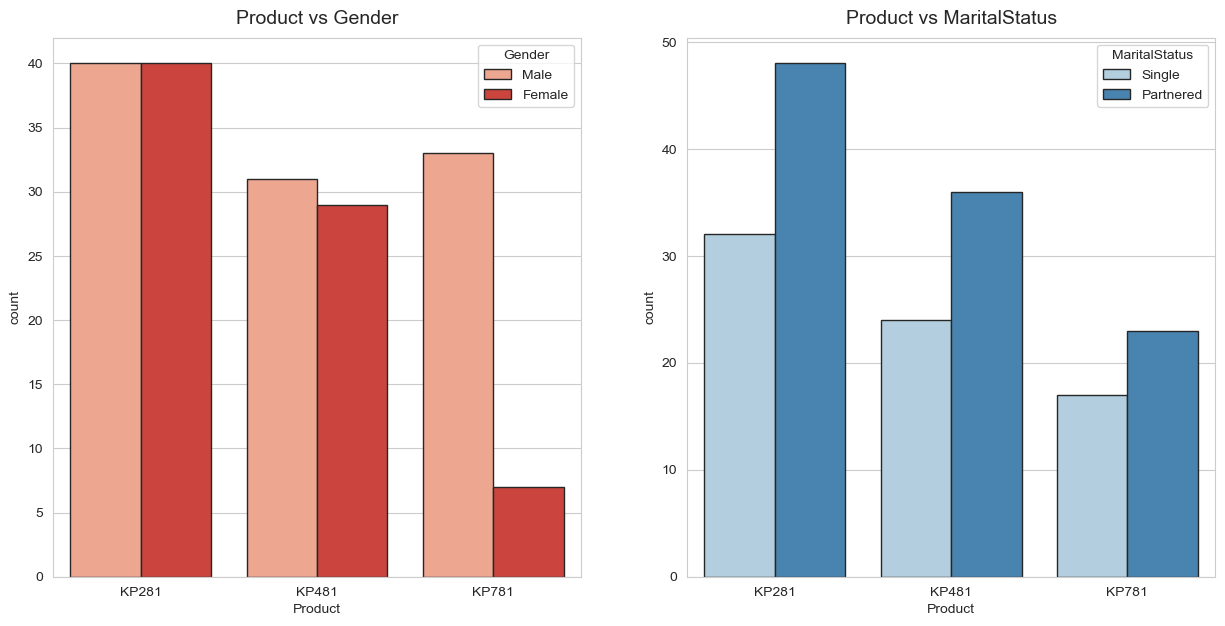

In [23]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Reds', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Blues', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

Obervations
1. Product vs Gender

Equal number of males and females have purchased KP281 product and Almost same for the product KP481
However,KP781 most of the customers are males

2. Product vs MaritalStatus

Maried customers are more likely to buy the products

Effect of the following  product purchases:
Age
Education
Usage
Fitness
Income
Mile

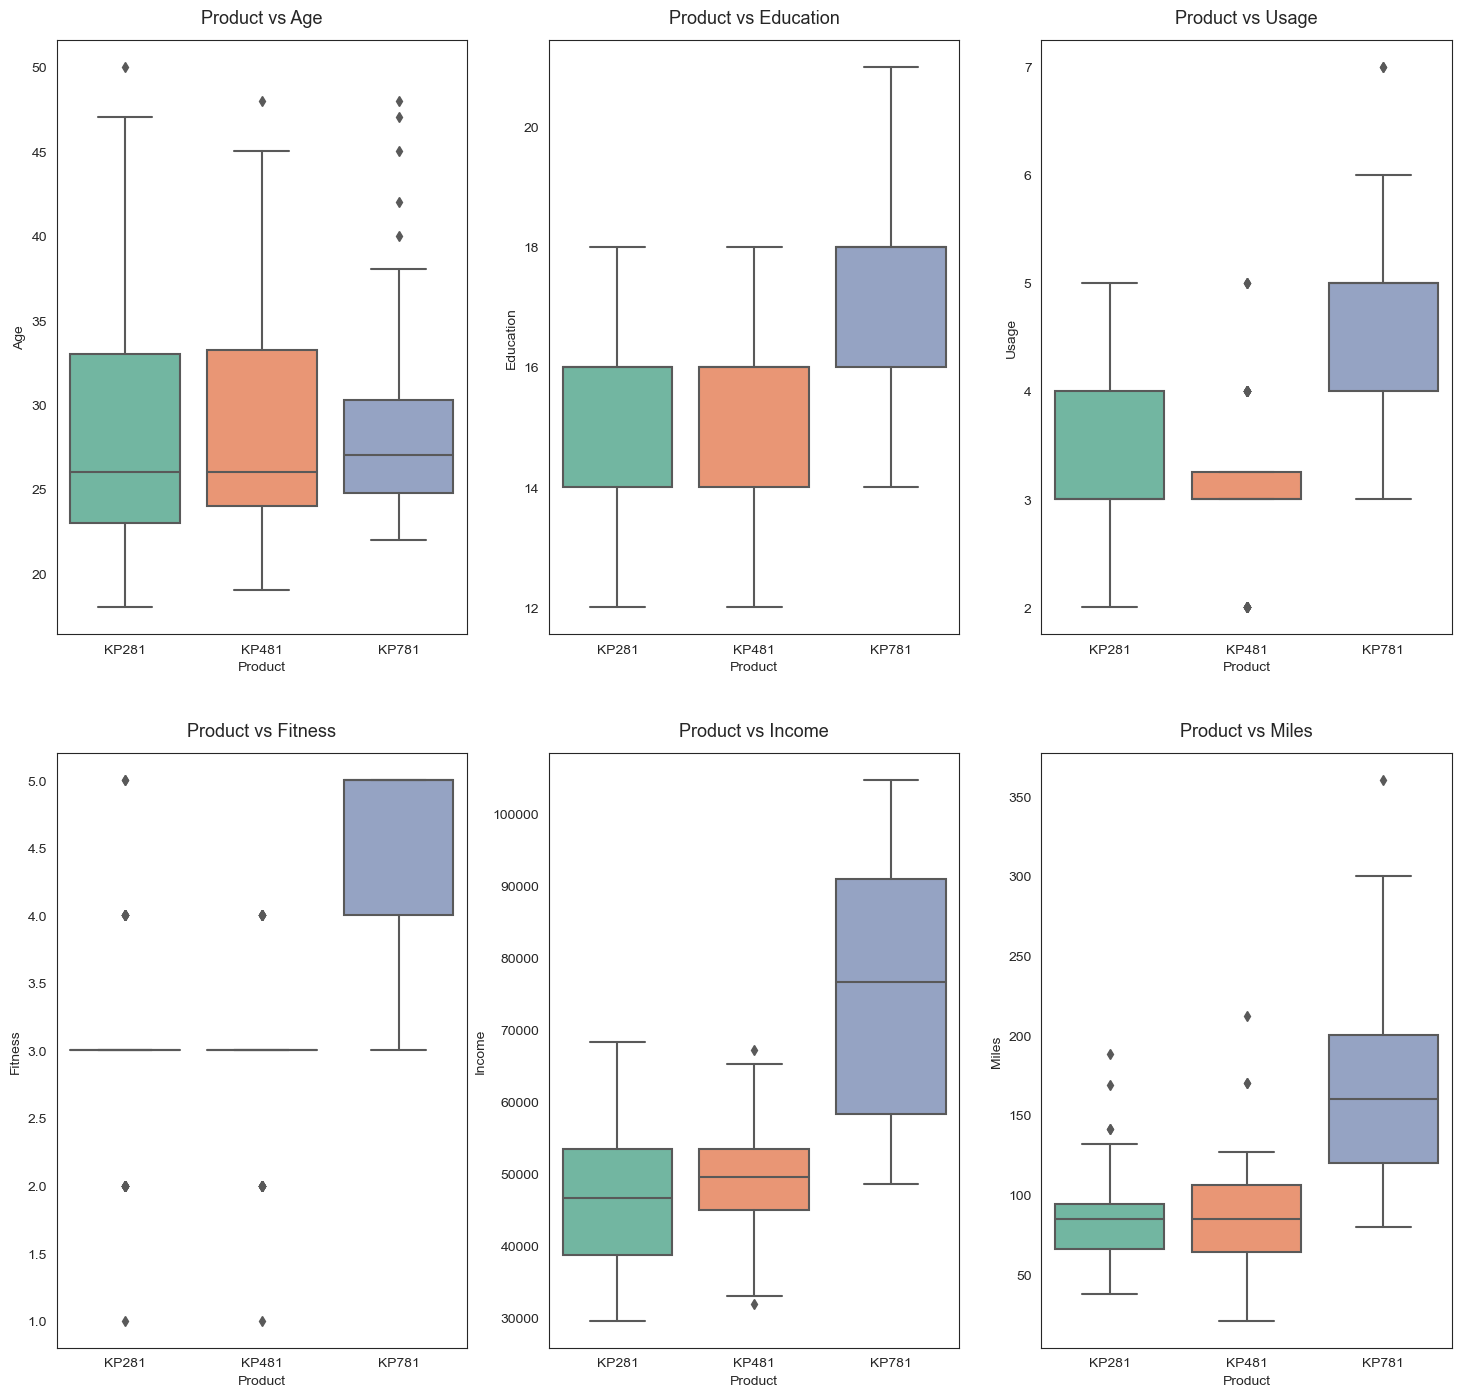

In [24]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set2')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

Observations

1. Product vs Age

    Customers purchasing products KP281 & KP481 are having same Age median value.
    Customers whose age lies between 25-30, are more likely to buy KP781 product.
    
2. Product vs Education 

    Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
    While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

3. Product vs Usage
    
    Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
    While the other customers are likely to purchasing KP281 or KP481.

4. Product vs Fitness

    The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

5. Product vs Income

    Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

6. Product vs Miles
    
    If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

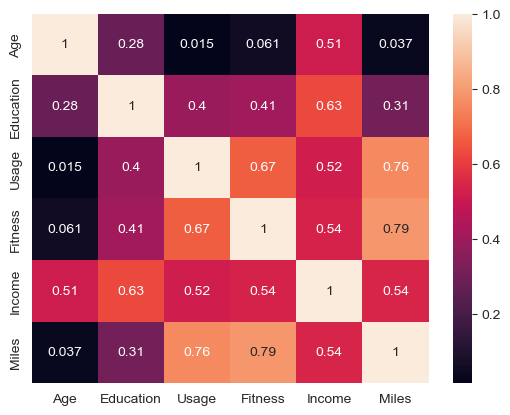

In [25]:
sns.heatmap(df.corr(), annot=True) 
plt.show()

Conclusion:

1.We have strong relaiton between Fitness and Miles (0.79)

2.We have strong relaiton between Usage and Miles (0.76)

3.We have some relaiton between Fitness and Usage (0.67)

(Marginal Probabilities, Joint Probabilities, Conditional Probabilities)


Product - Gender


Product - Fitness


Product - Age

Product - Marital Status

In [26]:
bins_income = [29000, 35000, 60000, 85000,105000]
labels_income = ['Low Income','Lower-middle income','Upper-Middle income', 'High income']
df['IncomeSlab'] = pd.cut(df['Income'],bins_income,labels = labels_income)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeSlab
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower-middle income


In [27]:
pd.crosstab(index=df['Product'], columns=[df['IncomeSlab']],margins=True) 

IncomeSlab,Low Income,Lower-middle income,Upper-Middle income,High income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


Percentage of a high-income customer purchasing a treadmill (Marginal Probability)

In [28]:
round(17/180,2)

0.09

Percentage of a high-income customer purchasing a KP781 treadmill (Marginal Probability)

In [29]:
round(17/40,2)

0.42

which is significantly high

In [30]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Probability of each product given gender

In [31]:
df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
df1

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [32]:
def prob_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
prob_given_gender('Male', True)
prob_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



Probability of each product given MaritalStatus

In [33]:
def prob_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")
    
prob_given_mstatus('Single', True)
prob_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



## Conclusion (Important Observations):

  - Model **KP281** is the **best-selling product**. **44.0%** of all treadmill **sales go to model KP281.**
  - The majority of treadmill customers fall within the **USD 45,000 - USD 80,000** income bracket. **83%** of treadmills are bought by individuals with incomes between **USD dollor 35000 and 85000.**
  - There are only **8%** of customers with **incomes below USD 35000** who buy treadmills.
  - **88%** of treadmills are purchased by **customers aged 20 to 40.**
  - **Miles and Fitness** & **Miles and Usage** are highly correlated, which means if a customer's fitness level is high they use more treadmills.
  - **KP781** is the only model purchased by a customer who has more than **20 years of education and an income of over USD dollor 85,000.**
  - With **Fitness level 4 and 5,** the customers tend to use **high-end models** and the **average number of miles is above 150 per week** 

## Recommendations
  - **KP281 & KP481** are popular with customers earning **USD 45,000 and USD 60,000** and can be offered by these companies as **affordable models.**
  - **KP781** should be marketed as a **Premium Model** and marketing it to **high income groups and educational over 20 years** market segments could result in more sales.
  - Aerofit should conduct **market research** to determine if it can attract customers with **income under USD 35,000 to expand its customer base.**
  - The **KP781 is a premium model**, so it is ideally suited for **sporty people** who have a high average weekly mileage.